In [ ]:
# Importing Libraries.

# Data Processing.
import pandas as pd
import numpy as np

# Handling Null Values.
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing custom color palette.
from matplotlib.colors import LinearSegmentedColormap

# Evaluating the linearity of relationships between variables and the distribution of variables (Statistics).
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuration.
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Managing Warnings.
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Custom Color Palette - Team 1 Palette (No White or Black)
paleta_team_1 = [
    "#DA878E",  # Soft Pink
    "#E99A7B",  # Salmón
    "#F1D09E",  # Beige
    "#9EBE99",  # Soft Green
    "#91B0BC",  # Grayish Blue
    "#9E81BA",  # Pastel Purple
    "#D994BF"   # Pastel Pink
]

def apply_team_palette():
    """
    Apply the base team palette to seaborn
    """
    sns.set_palette(paleta_team_1)
    print("Team palette applied (white and black removed)")

def get_gradient_cmap(name="team_palette_gradient", N=256):
    """
    Generate a gradient colormap from the base palette for heatmaps or large color needs
    """
    return LinearSegmentedColormap.from_list(name, paleta_team_1, N=N)


In [ ]:
# We import the cleaned CSV with its transformations.
df_talent = pd.read_csv('df_talento_limpio.csv' , sep=',')


In [ ]:
# We check that the dataframe is clean.
df_talent.head(10)


,age,attrition,business_travel,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work
0,51,no,unknown,research_&_development,6,3,unknown,162,1,male,3,5,research director,3,unknown,19537.000000,7,No,13,3,3,0,31,5,3,20,15,15,1972,yes
1,52,no,unknown,research_&_development,1,4,life_sciences,259,3,male,2,5,manager,3,unknown,19999.000000,0,unknown,14,3,1,1,34,5,3,33,11,9,1971,yes
2,42,no,travel_rarely,research_&_development,4,2,technical_degree,319,3,male,3,5,manager,4,married,19232.000000,1,No,11,3,4,0,22,3,3,22,11,15,1981,yes
3,48,no,unknown,research_&_development,22,3,medical,1900,4,female,3,4,manager,4,unknown,17174.000000,3,No,11,3,2,1,26,3,3,22,4,7,1975,yes
4,59,no,unknown,sales,25,3,life_sciences,81,1,female,3,3,sales executive,1,unknown,6527.918425,7,unknown,11,3,4,0,28,3,2,21,7,9,1964,yes
5,42,no,travel_rarely,sales,1,1,unknown,387,2,male,3,2,sales executive,3,married,6527.918425,1,No,25,4,3,0,20,3,3,20,11,6,1981,no
6,41,no,travel_frequently,research_&_development,9,3,unknown,999,1,male,3,5,research director,3,unknown,6527.918425,2,No,17,3,2,1,21,2,4,18,0,11,1982,no
7,41,no,non-travel,research_&_development,7,1,unknown,1035,2,female,1,5,research director,3,unknown,19973.000000,1,No,22,4,2,2,31,3,3,21,5,10,1982,no
8,41,yes,travel_rarely,research_&_development,12,3,unknown,58,2,female,3,5,research director,3,married,19545.000000,1,No,12,3,4,0,32,0,3,22,15,8,1982,no
9,40,no,travel_rarely,research_&_development,2,4,unknown,558,3,female,3,5,manager,3,unknown,18041.000000,0,No,14,3,4,0,26,2,3,20,1,12,1983,no


In [ ]:
df_talent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1510 non-null   int64  
 1   attrition                   1510 non-null   object 
 2   business_travel             1510 non-null   object 
 3   department                  1510 non-null   object 
 4   distance_from_home          1510 non-null   int64  
 5   education                   1510 non-null   int64  
 6   education_field             1510 non-null   object 
 7   employee_number             1510 non-null   object 
 8   environment_satisfaction    1510 non-null   int64  
 9   gender                      1510 non-null   object 
 10  job_involvement             1510 non-null   int64  
 11  job_level                   1510 non-null   int64  
 12  job_role                    1510 non-null   object 
 13  job_satisfaction            1510 

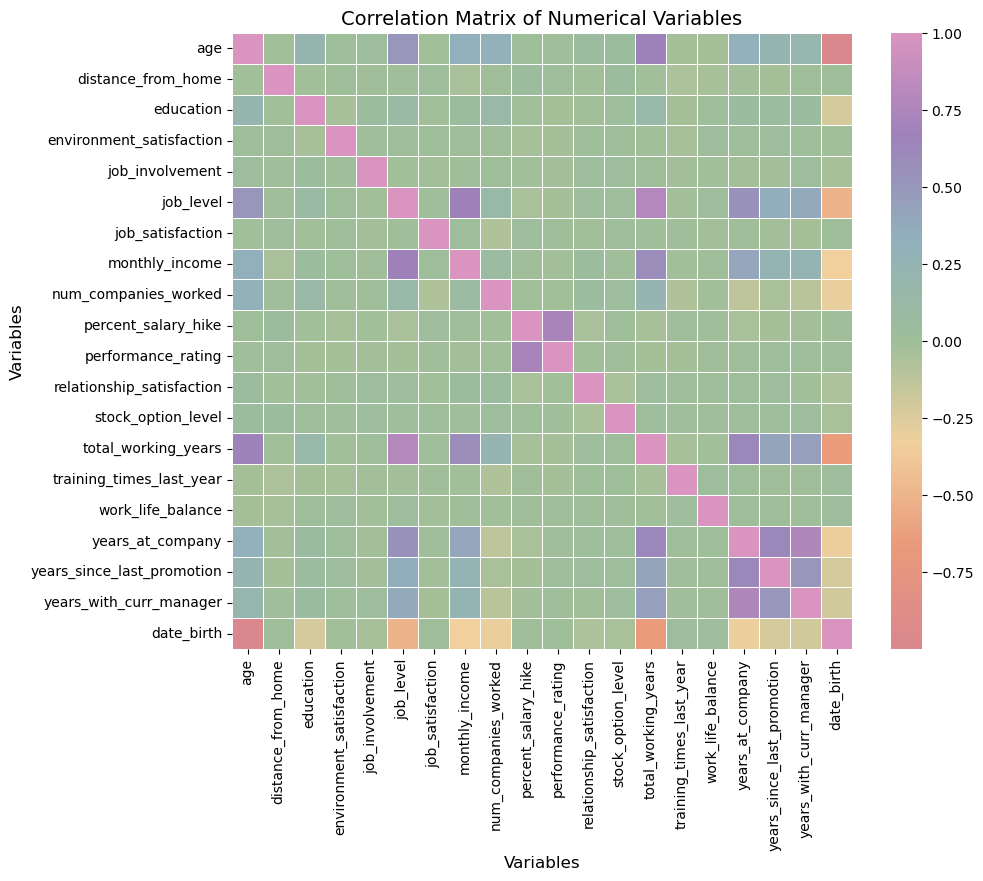

In [ ]:
# Correlation Analysis Between Numerical Variables

# Heatmap
cmap = get_gradient_cmap()
variables_corr = df_talent.select_dtypes(include=['number']).corr()

# Titles and labels.
plt.figure(figsize=(10, 8))
sns.heatmap(variables_corr, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.show()


This graph is ideal for identifying important patterns or dependencies in the data.

From this visualization, we observe that most variables do not have strong correlations with each other.


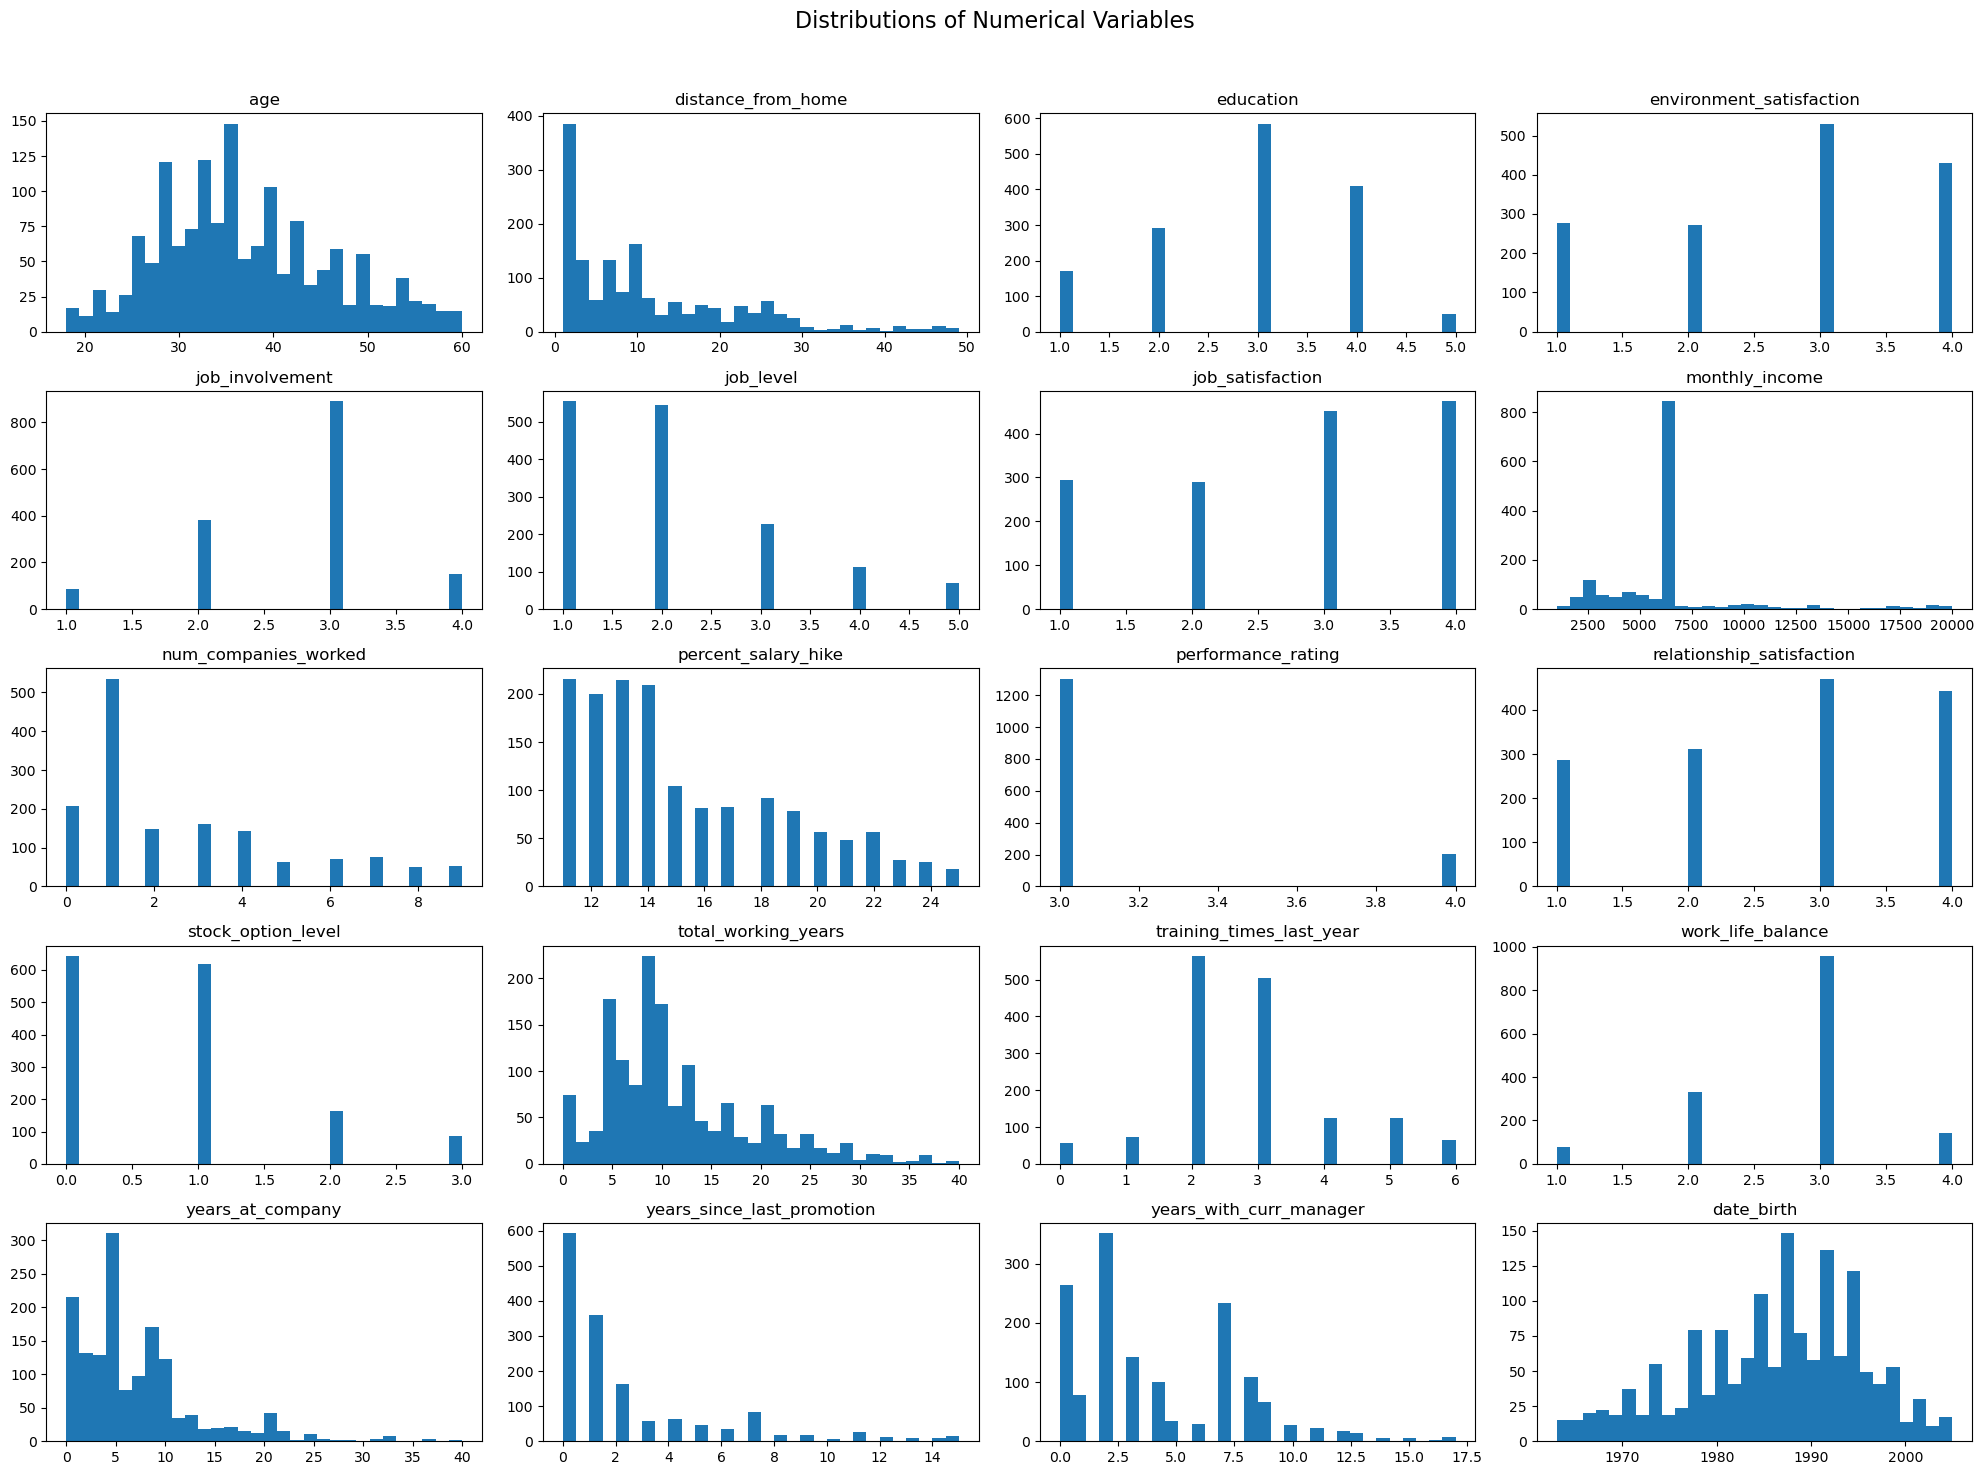

In [ ]:
# Analysis of Numerical Distributions

# Histogram.
df_talent.hist(bins=30, figsize=(20, 15), grid=False)

# Titles and labels
plt.suptitle('Distributions of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Most histograms show asymmetrical distributions. The ones that appear somewhat symmetric, even if not centered, are:

- Age: Clearly shows an age distribution between 18 and 60.
- Date_birth: reflects the same values as the age variable.
- Distance_from_home: indicates that most employees live near their workplace.
- Total_working_years: shows that most employees have been working between 5 and 15 years.
- Years at Company: suggests that most employees have worked at the same company for 0 to 10 years.


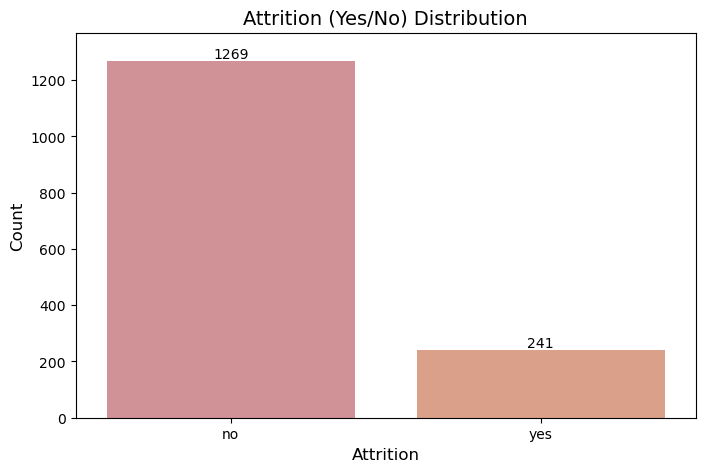

In [ ]:
# Attrition Rate Distribution

# Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_talent, x='attrition', palette=paleta_team_1[:2])

# Titles and labels
plt.title('Attrition (Yes/No) Distribution', fontsize=14)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Count', fontsize=12)
max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 100)
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 8, f'{count}', ha='center', fontsize=10)
plt.show()


This graph provides an overview of employee status. It reveals that most employees remain active in their jobs, while a smaller percentage have left the company.

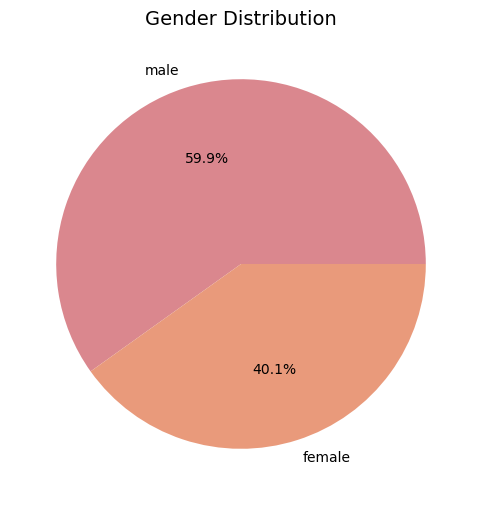

In [ ]:
# Gender Distribution
gender_counts = df_talent['gender'].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))

# Titles and labels
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=paleta_team_1)
plt.title('Gender Distribution', fontsize=14)
plt.show()


The graph shows that men constitute the majority of employees, while women make up a smaller percentage of the workforce.

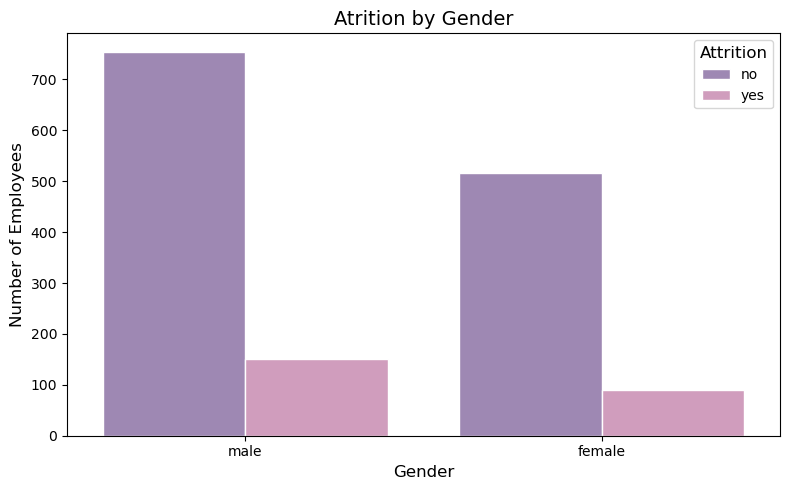

In [ ]:
# Gender and Attrition Rate Relationship

# Configuracçtion
custom_colors = [paleta_team_1[5], paleta_team_1[6]]
plt.figure(figsize=(8, 5))

# Bar Chart
ax = sns.countplot(data=df_talent, x='gender', hue='attrition', palette=custom_colors, edgecolor='white')
for p in ax.patches:
    count = int(p.get_height())
    ax.text

# Titles and labels
plt.title("Atrition by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title="Attrition", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()


Employee turnover is higher among men than women. The absolute number of men leaving the company is greater than that of women.


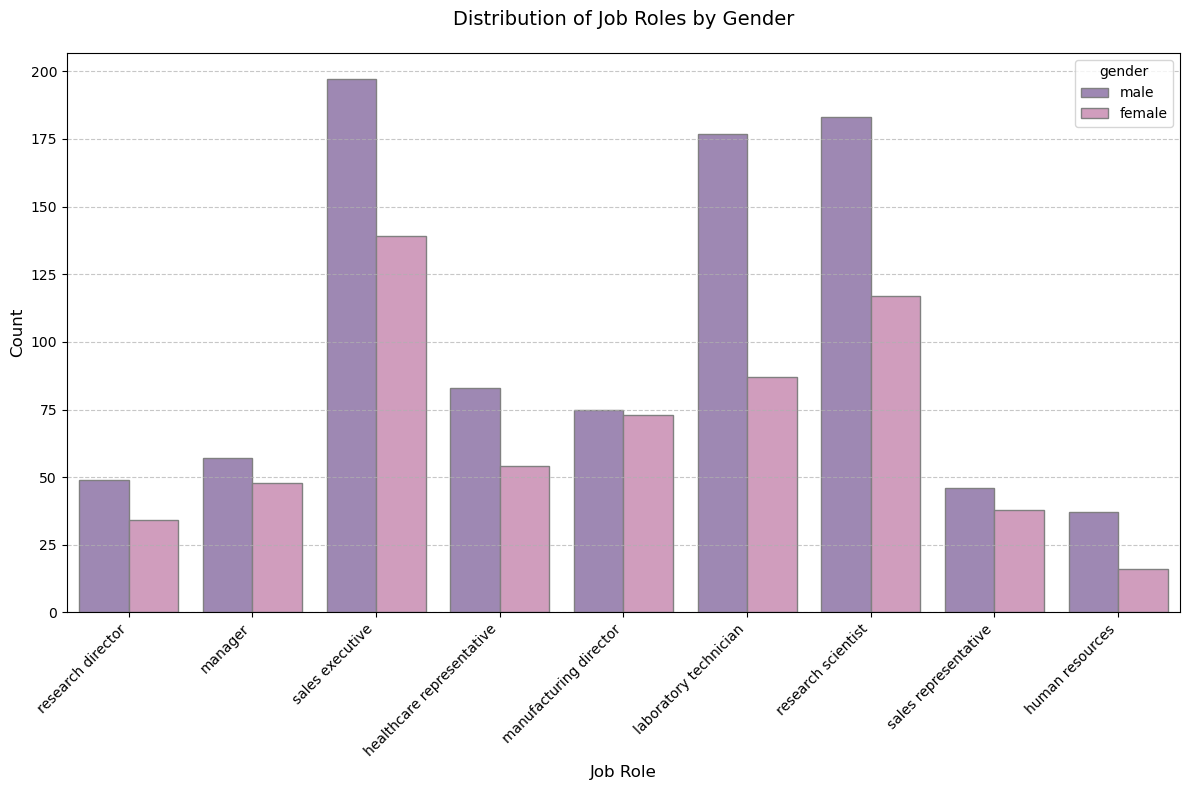

In [ ]:
# Job Role Distribution by Gender

# Configuration
custom_colors = [paleta_team_1[5], paleta_team_1[6]]
plt.figure(figsize=(12, 8))

# Bar Chart
sns.countplot(data=df_talent, x='job_role', hue='gender', palette=custom_colors, edgecolor='grey')

# Titles and labels
plt.title('Distribution of Job Roles by Gender', fontsize=14, pad=20)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Across all job roles, men outnumber women. However, some positions, such as **Sales Executive**, **Laboratory Technician**, **Research Scientist**, and **Human Resources**, show a particularly strong male predominance.


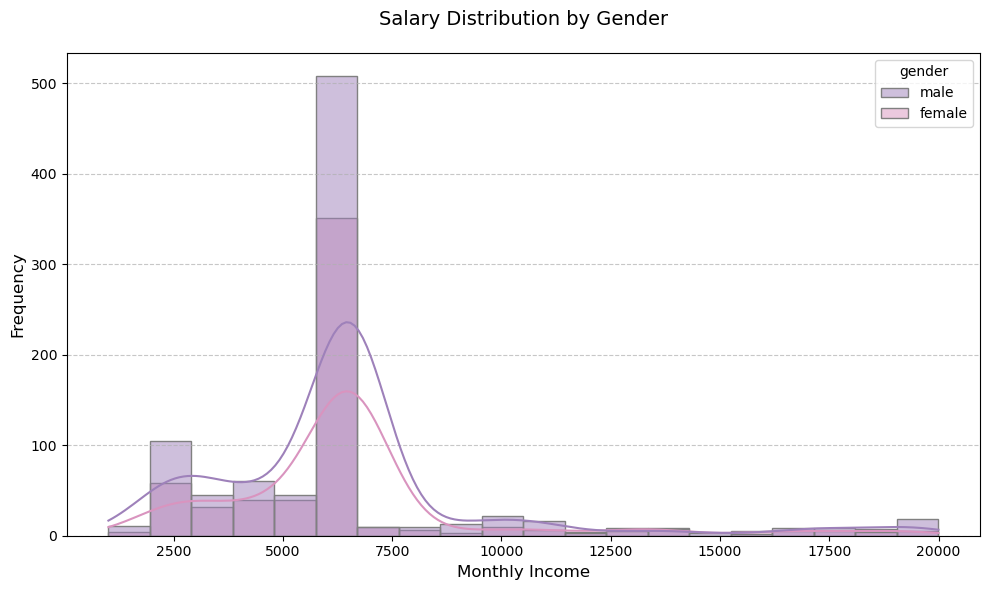

In [ ]:
# Salary Distribution by Gender

# Configuration
custom_colors = [paleta_team_1[5], paleta_team_1[6]]
plt.figure(figsize=(10, 6))

# Histogram.
sns.histplot(data=df_talent, x='monthly_income', hue='gender', kde=True, bins=20, palette=custom_colors, edgecolor='grey')
plt.title('Salary Distribution by Gender', fontsize=14, pad=20)

# Titles and labels
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The graph shows that men tend to earn higher salaries than women, highlighting a persistent gender pay gap.
Considering the previous graph, men dominate higher-level positions, which may contribute to this disparity.


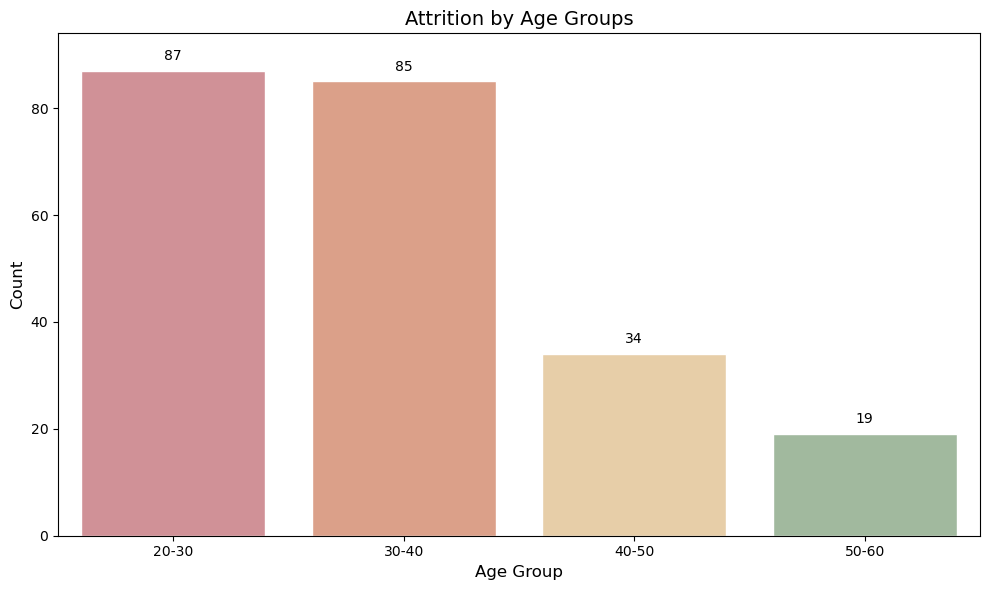

In [ ]:
# Employee Attrition by Age
filtered_data = df_talent[df_talent['attrition'] == 'yes']
age_bins = pd.cut(filtered_data['age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Configuration.
plt.figure(figsize=(10, 6))

# Bar Chart.
ax = sns.countplot(x=age_bins, data=filtered_data, palette=paleta_team_1, edgecolor='white')

# Titles and labels
plt.title('Attrition by Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 7)
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, f'{count}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


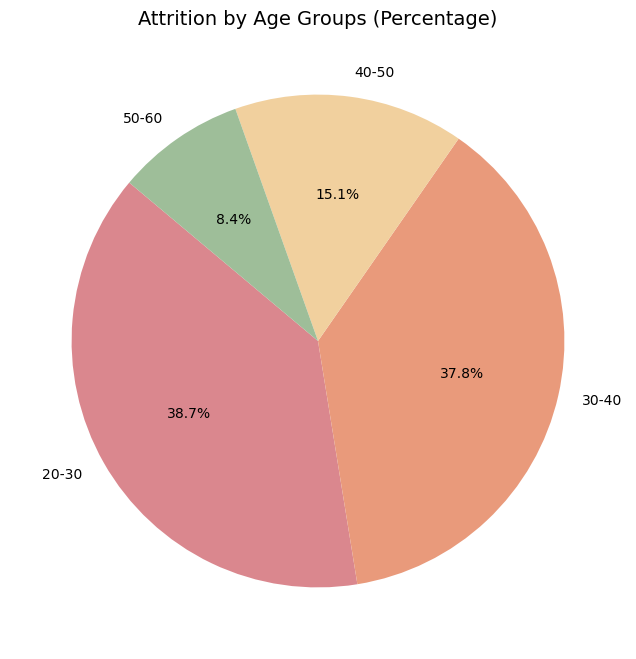

In [ ]:
# Age Group Percentages.

# Pie Chart
age_groups = pd.cut(filtered_data['age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
age_group_counts = age_groups.value_counts().sort_index()
age_group_percentages = (age_group_counts / age_group_counts.sum()) * 100

# Titles and labels
plt.figure(figsize=(8, 8))
plt.pie(age_group_percentages, labels=age_group_percentages.index, autopct='%1.1f%%', colors=paleta_team_1[:4], startangle=140)
plt.title('Attrition by Age Groups (Percentage)', fontsize=14)
plt.show()


High turnover among younger employees (20-40 years old):

    - Early-career employees may be exploring new opportunities or roles, leading to higher attrition rates.

Lower turnover among older employees (50-60 years old):

    - More experienced employees likely value job stability or are nearing retirement, leading to lower attrition rates.

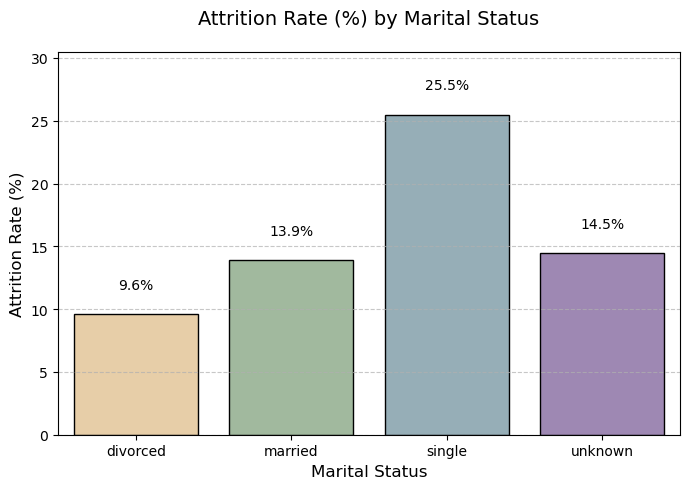

In [ ]:
# Relationship Between Marital Status and Attrition Rate
totales_estado_civil = df_talent.groupby('marital_status').size()
baja_estado_civil = df_talent[df_talent['attrition'] == 'yes'].groupby('marital_status').size()
porciento_estado_civil = (baja_estado_civil / totales_estado_civil) * 100
porciento_estado_civil = porciento_estado_civil.reset_index().rename(columns={0: 'attrition_pct'})
porciento_estado_civil['attrition_pct'] = porciento_estado_civil['attrition_pct'].round(2)

# Configuration
custom_colors = [paleta_team_1[2], paleta_team_1[3], paleta_team_1[4], paleta_team_1[5]]
plt.figure(figsize=(7, 5))

# Bar Chart
ax = sns.barplot(x='marital_status', y='attrition_pct', data=porciento_estado_civil, palette=custom_colors, edgecolor='black')

# Titles and labels
plt.title('Attrition Rate (%) by Marital Status', fontsize=14, pad=20)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
max_height = porciento_estado_civil['attrition_pct'].max()
plt.ylim(0, max_height + 5) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{height:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


Our analysis focuses on **single employees**, who represent the group with the highest attrition rate. On the other hand, **divorced employees** stand out as the most stable in terms of job retention.


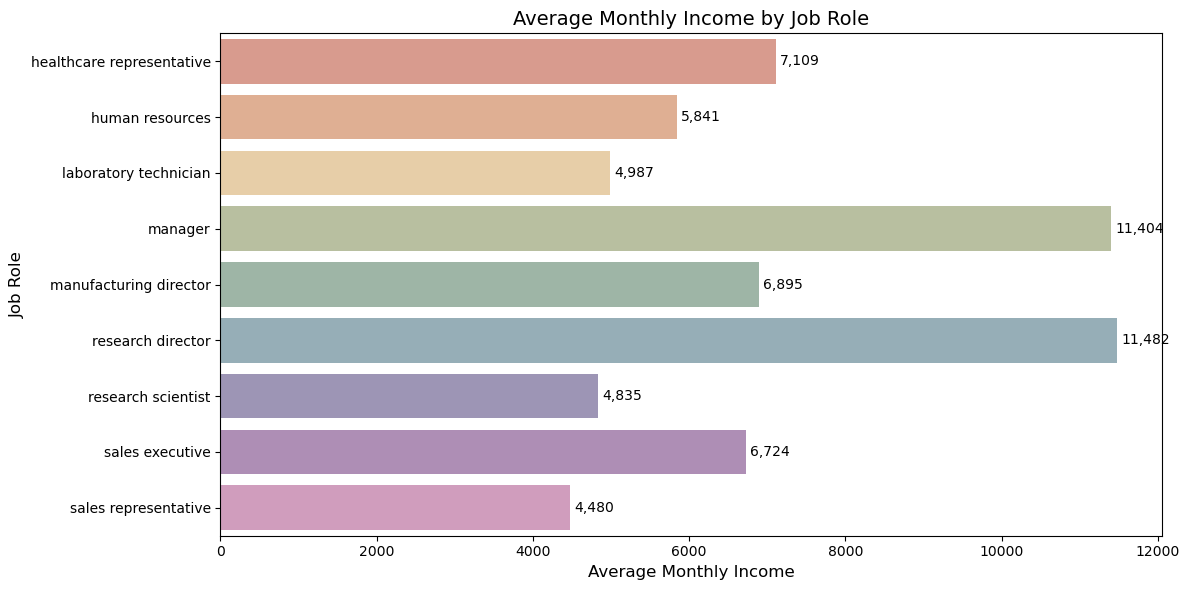

In [ ]:
# Ingreso mensual promedio por puesto de trabajo.
position_salary = df_talent.groupby("job_role")["monthly_income"].mean().reset_index()

# Crear un mapa de colores.
cmap = get_gradient_cmap()

# Configuración del gráfico.
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y="job_role",
    x="monthly_income",
    data=position_salary,
    palette=cmap(position_salary["job_role"].rank(pct=True)))

# Titles and labels
plt.xlabel("Average Monthly Income", fontsize=12)
plt.ylabel("Job Role", fontsize=12)
plt.title("Average Monthly Income by Job Role", fontsize=14)

# Añadir los valores a las barras.
for patch in ax.patches:
    width = patch.get_width()
    plt.text(
        width + 50,
        patch.get_y() + patch.get_height() / 2,
        f'{width:,.0f}',
        va='center',
        fontsize=10)
plt.tight_layout()
plt.show()


The graph displays the average salary for each job category. The following observations stand out:  

**Categories with the lowest average salary:**  
- Sales Representatives
- Research Scientists
- Laboratory Technicians

**Categories with the highest average salary:**  
- Research Directors  
- Managers

This demonstrates that as job seniority increases, salaries tend to rise, establishing a clear correlation between job hierarchy and economic compensation.

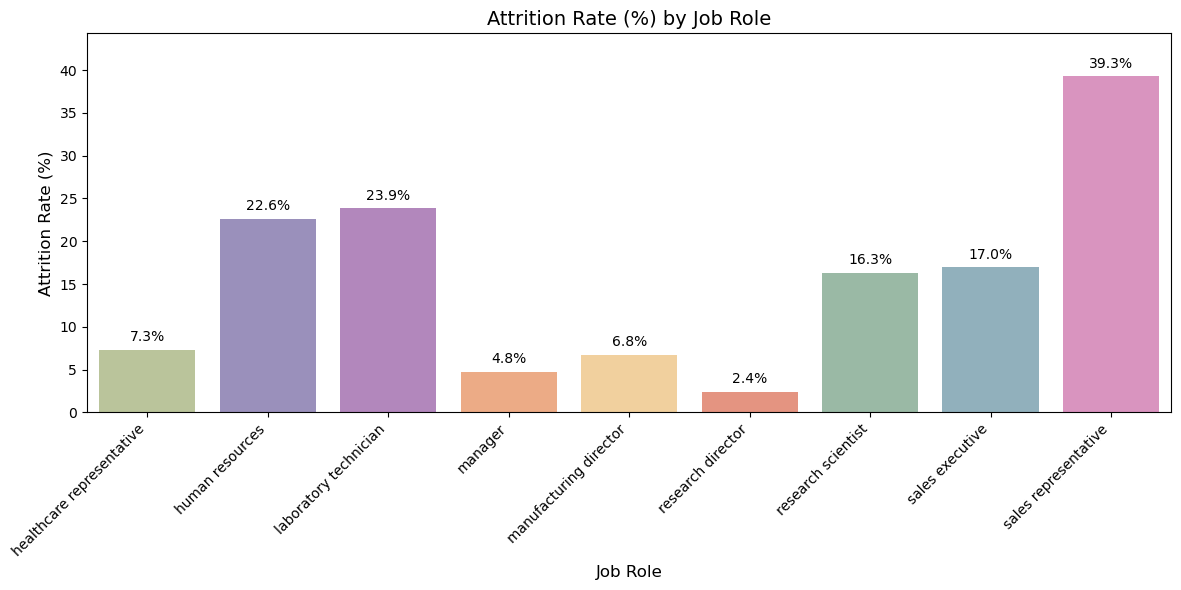

In [ ]:
# Análisis de la tasa de deserción por puesto de trabajo.

# Crear un mapa de colores.
cmap = get_gradient_cmap()
total_job = df_talent.groupby('job_role').size()
baja_job = df_talent[df_talent['attrition'] == 'yes'].groupby('job_role').size()
porciento_job = (baja_job / total_job) * 100
porciento_job = porciento_job.reset_index().rename(columns={0: 'attrition_pct'})
norm_values = porciento_job['attrition_pct'].rank(pct=True)

# Configuración del gráfico.
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='job_role',
    y='attrition_pct',
    data=porciento_job,
    color='gray')

for i, patch in enumerate(ax.patches):
    color = cmap(norm_values.iloc[i])
    patch.set_facecolor(color)

# Titles and labels
plt.title('Attrition Rate (%) by Job Role', fontsize=14)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xlabel('Job Role', fontsize=12)
plt.xticks(rotation=45, ha='right')
max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 5)

# Añadir los valores a las barras.
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


The graph identifies the departments with the highest employee attrition rates, specifically:  

    - Sales Representatives 
    - Human Resources
    - Laboratory Technicians 

Additionally, when comparing this graph with the previous analysis, a notable correlation between salary level and attrition rate becomes evident. As salaries decrease, the likelihood of employees leaving the company increases significantly. This finding highlights salary levels as a key factor in employee retention within the organization.

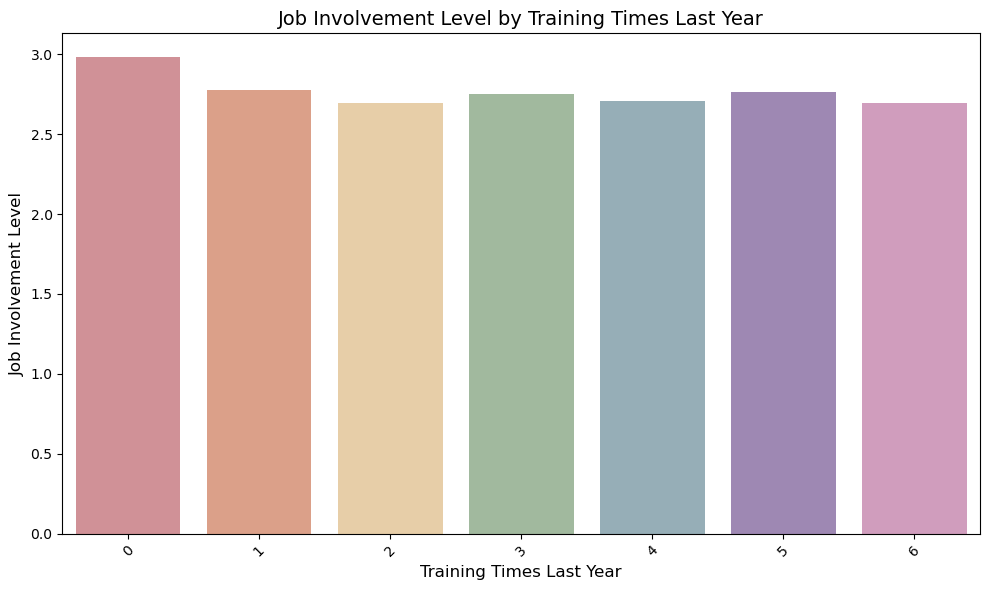

In [ ]:
# Work Engagement by Training Frequency in the Last Year
group_training = df_talent.groupby('training_times_last_year')['job_involvement'].mean().reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="training_times_last_year", y="job_involvement", data=group_training, palette=paleta_team_1)

# Titles and labels
plt.title('Job Involvement Level by Training Times Last Year', fontsize=14)
plt.xlabel('Training Times Last Year', fontsize=12)
plt.ylabel('Job Involvement Level', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph reflects the relationship between training and job commitment. Initially, there is a slight increase in the number of training sessions, which could be linked to the onboarding program offered to employees at the start of their careers.  

However, in later years, the training frequency remains relatively constant. This suggests that the training programs are designed to be uniform and accessible to all employees, regardless of their tenure within the organization.


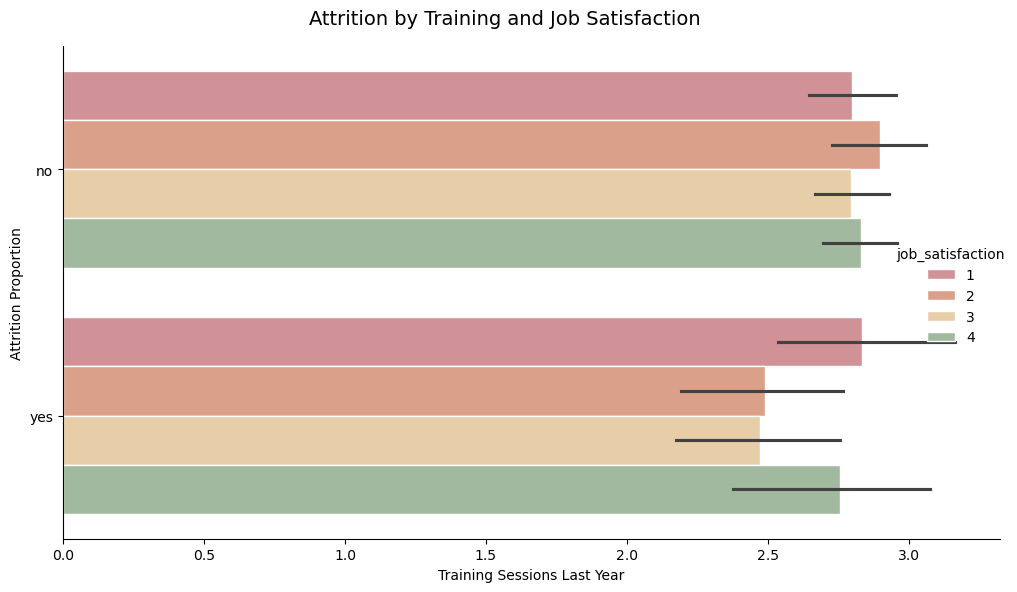

In [ ]:
# Impact of Training, Job Satisfaction, and Attrition

# Categorical Bar Chart
g = sns.catplot(data=df_talent, x='training_times_last_year', y='attrition', hue='job_satisfaction', kind='bar',palette=paleta_team_1, height=6, aspect=1.5, edgecolor='white')
g.set_axis_labels("Training Sessions Last Year", "Attrition Proportion")

# Titles and labels
g.fig.suptitle("Attrition by Training and Job Satisfaction", fontsize=14)
plt.tight_layout()
plt.show()


This graph can be divided into two sections:  

    - Employees who left the company:  
These employees received training, but those who underwent the least training are the ones who rated the company neutrally.  
Regarding satisfaction, there are two major trends: some employees were very happy with the company yet still left, while others were dissatisfied and also decided to leave.  
This suggests that job satisfaction is not the main factor in the decision to leave, though it may still play a role.  

    - Employees who stayed in the company: 
Most of these employees received similar training courses, and their satisfaction levels are fairly consistent across the group.

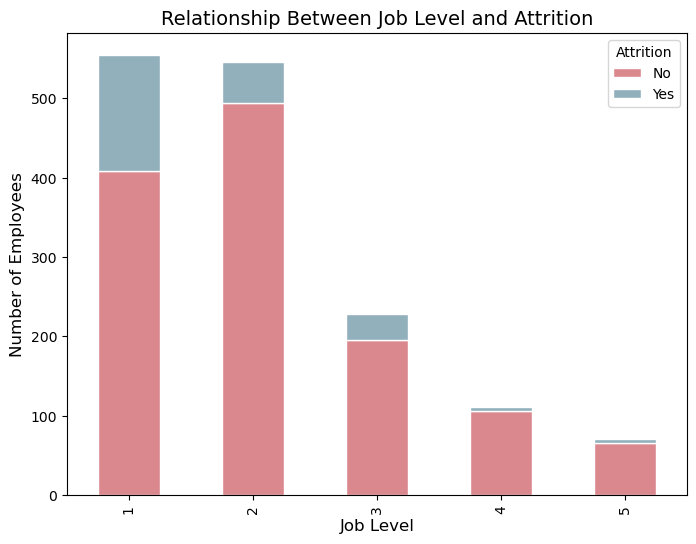

In [ ]:
# Relación entre el nivel de puesto y la tasa de deserción.

# Gráfico de barras apiladas.
job_attrition_counts = pd.crosstab(df_talent['job_level'], df_talent['attrition'])
job_attrition_counts.plot(kind='bar', stacked=True, color=[paleta_team_1[0], paleta_team_1[4]], figsize=(8, 6), edgecolor='white')
plt.title('Relationship Between Job Level and Attrition', fontsize=14)

# Titles and labels
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()


In this graph, we can see the turnover rate in relation to hierarchical levels.  
There is a clear trend: the lower the hierarchy level, the higher the turnover rate. However, it is important to note that the first two levels have a higher number of employees compared to other hierarchical levels.  

At **level 3**, turnover is particularly high, which may be due to factors such as increased job pressure, lower satisfaction, or unmet expectations associated with being in an intermediate position.  

Turnover is lower at higher levels, as employees in these positions likely receive better benefits or have greater job stability, reducing the likelihood of leaving the company.

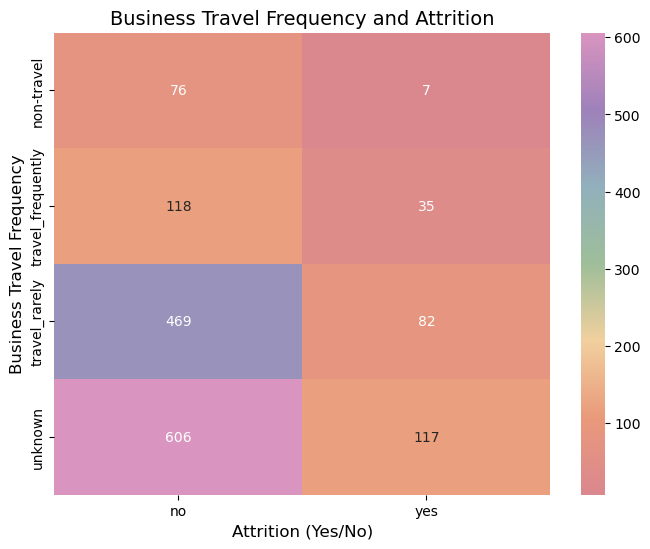

In [ ]:
# Relationship Between Business Travel Frequency and Attrition Rate

# Heatmap
heatmap_data = df_talent.groupby(['business_travel', 'attrition']).size().reset_index(name='Count')
heatmap_data_pivot = heatmap_data.pivot(index='business_travel', columns='attrition', values='Count')
cmap = get_gradient_cmap()

# Titles and labels
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_pivot, annot=True, cmap=cmap, fmt='d')
plt.title('Business Travel Frequency and Attrition', fontsize=14)
plt.xlabel('Attrition (Yes/No)', fontsize=12)
plt.ylabel('Business Travel Frequency', fontsize=12)
plt.show()


After excluding unknown values, we find no significant correlation between travel frequency and employee turnover.
Most frequent travelers remain employed.



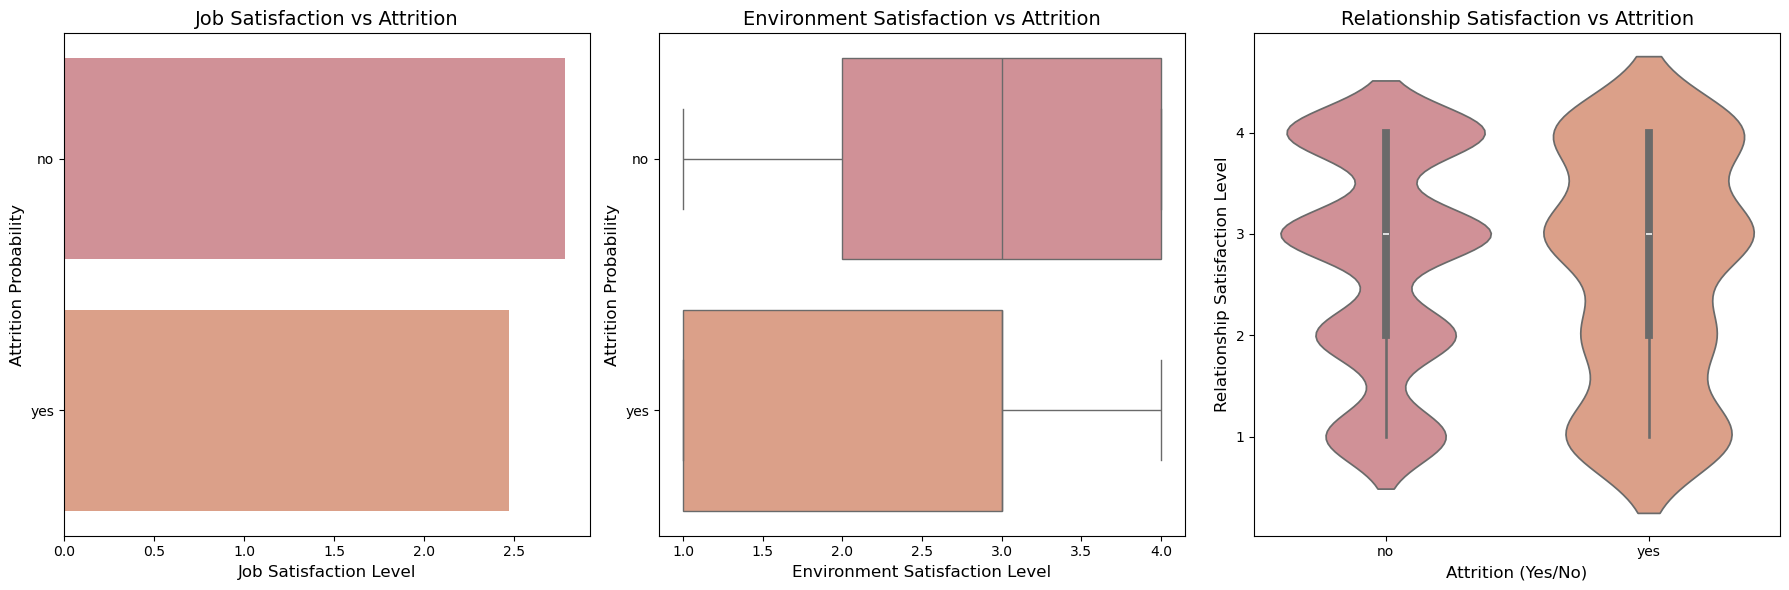

In [ ]:
# Impact of Job Satisfaction, Environment Satisfaction, and Relationship Satisfaction on Attrition
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Barplot - Job Satisfaction vs Attrition.
sns.barplot(data=df_talent, x='job_satisfaction', y='attrition', ci=None, palette=paleta_team_1, ax=axes[0])

# Titles and labels
axes[0].set_title('Job Satisfaction vs Attrition', fontsize=14)
axes[0].set_xlabel('Job Satisfaction Level', fontsize=12)
axes[0].set_ylabel('Attrition Probability', fontsize=12)

# 2. Boxplot - Environment Satisfaction vs Attrition.
sns.boxplot(data=df_talent, x='environment_satisfaction', y='attrition',  palette=paleta_team_1, ax=axes[1])

# Titles and labels
axes[1].set_title('Environment Satisfaction vs Attrition', fontsize=14)
axes[1].set_xlabel('Environment Satisfaction Level', fontsize=12)
axes[1].set_ylabel('Attrition Probability', fontsize=12)

# 3. Violinplot - Relationship Satisfaction vs Attrition.
sns.violinplot(data=df_talent, x='attrition', y='relationship_satisfaction', palette=paleta_team_1, ax=axes[2])

# Titles and labels
axes[2].set_title('Relationship Satisfaction vs Attrition', fontsize=14)
axes[2].set_xlabel('Attrition (Yes/No)', fontsize=12)
axes[2].set_ylabel('Relationship Satisfaction Level', fontsize=12)
plt.tight_layout()
plt.show()


    - Relationship between Job Satisfaction and Attrition: 
  This graph compares job satisfaction levels with the likelihood of turnover.  
  Employees with higher job satisfaction tend to stay, while those with lower satisfaction levels have a higher probability of leaving the company.

    - Environment Satisfaction vs Attrition:
  This graph examines the relationship between satisfaction with the work environment and turnover.  
  Employees who are more satisfied with their work environment are more likely to stay in the organization.

    - Relationship between Relationship Satisfaction and Attrition:
  This graph shows the satisfaction with workplace relationships in relation to turnover.  
  Higher satisfaction with relationships at work is associated with a lower probability of turnover.

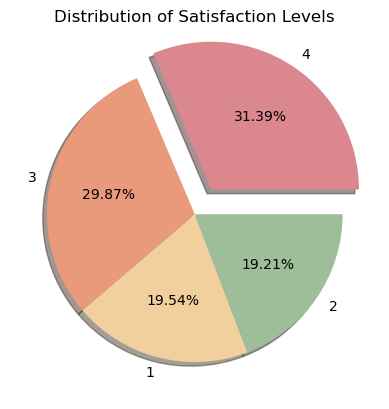

In [ ]:
# The graphs above seem very important to us, so we would like to create several graphs based on them.

# Distribution of satisfaction levels.
satisfaction_counts = df_talent['job_satisfaction'].value_counts()
y = satisfaction_counts

# Configuration
mylabels = ['Satisfacción']
myexplode = [0.2, 0, 0, 0]

# Pie Chart
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.2f%%', explode = myexplode, shadow = True, colors=paleta_team_1[:len(satisfaction_counts)])

# Titles and labels
plt.title("Distribution of Satisfaction Levels")
plt.show()


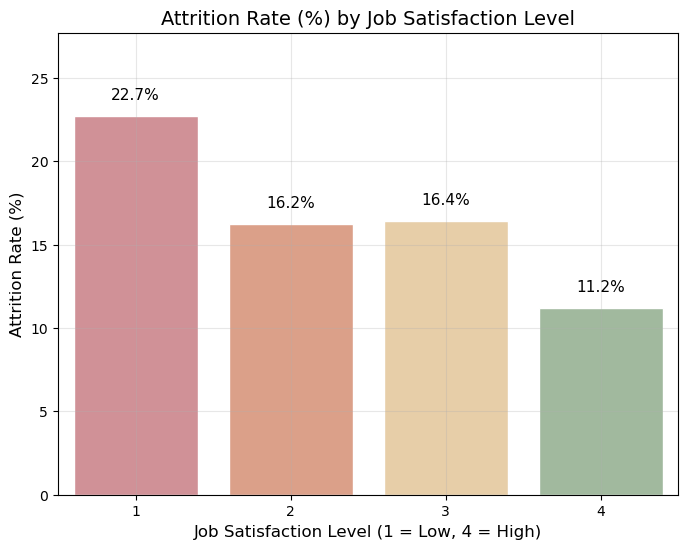

In [ ]:
# Attrition Rate (%) by Level of Job Satisfaction.
totales_satisfaction = df_talent.groupby('job_satisfaction').size()
bajas_satisfaction = df_talent[df_talent['attrition'] == 'yes'].groupby('job_satisfaction').size()
porciento_satisfaction = (bajas_satisfaction / totales_satisfaction) * 100
porciento_satisfaction = porciento_satisfaction.reset_index().rename(columns={0: 'attrition_pct'})
porciento_satisfaction['attrition_pct'] = porciento_satisfaction['attrition_pct'].round(2)

# Bar Chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='job_satisfaction', y='attrition_pct', data=porciento_satisfaction, palette=paleta_team_1, edgecolor='white')

# Titles and labels
plt.title('Attrition Rate (%) by Job Satisfaction Level', fontsize=14)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xlabel('Job Satisfaction Level (1 = Low, 4 = High)', fontsize=12)
max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 5)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()


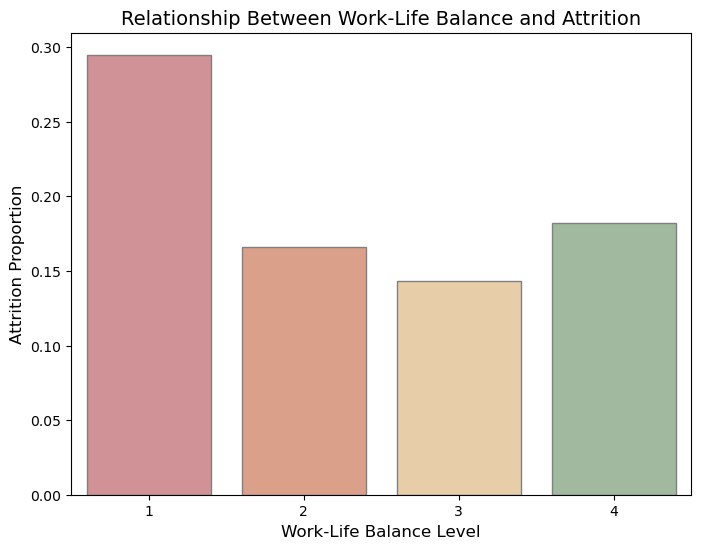

In [ ]:
# Impact of work-life balance on turnover rate.
df_talent['attrition_binary'] = df_talent['attrition'].apply(lambda x: 1 if x == 'yes' else 0)

# Configuration
plt.figure(figsize=(8, 6))

# Bar Chart
sns.barplot(data=df_talent, x='work_life_balance', y='attrition_binary', ci=None, palette=paleta_team_1, edgecolor='grey')

# Titles and labels
plt.title('Relationship Between Work-Life Balance and Attrition', fontsize=14)
plt.xlabel('Work-Life Balance Level', fontsize=12)
plt.ylabel('Attrition Proportion', fontsize=12)
plt.show()


Higher turnover with low WorkLifeBalance: Employees with a work-life balance level of 1.0 have the highest turnover proportion (approximately 30%). This suggests that a poor work-life balance may be linked to higher burnout and a decision to leave the company.

Reduction in turnover with a better balance: As WorkLifeBalance levels improve (from 2.0 to 4.0), the turnover proportion decreases significantly. At level 3.0, the lowest turnover is observed, indicating that a better work-life balance could be a protective factor against turnover.

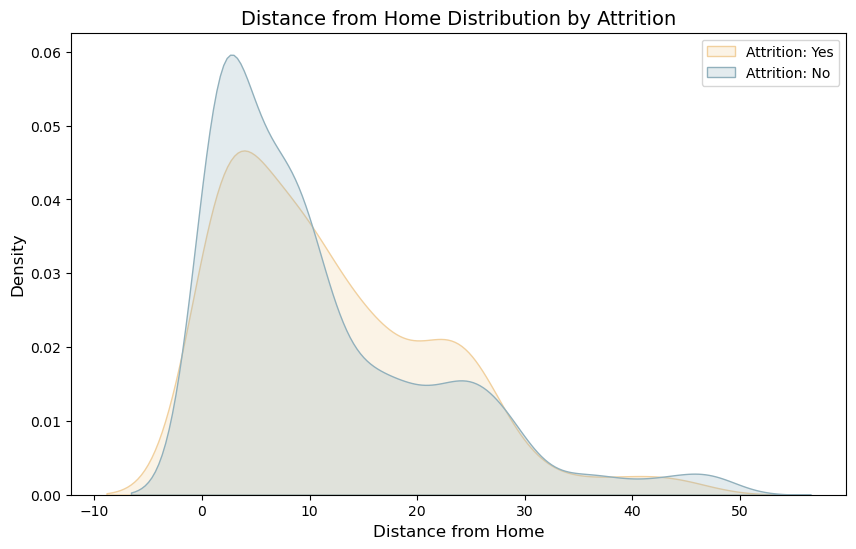

In [ ]:
# Relationship between distance to work and attrition rate.

# Configuration
plt.figure(figsize=(10, 6))

# Density diagram.
sns.kdeplot(data=df_talent[df_talent['attrition'] == 'yes'], x='distance_from_home', shade=True, label='Attrition: Yes', color=paleta_team_1[2])
sns.kdeplot(data=df_talent[df_talent['attrition'] == 'no'], x='distance_from_home', shade=True, label='Attrition: No',color=paleta_team_1[4])

# Titles and labels
plt.title('Distance from Home Distribution by Attrition', fontsize=14)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


El gráfico sugiere una relación entre la distancia al hogar y la probabilidad de rotación.
Los empleados que viven más cerca del trabajo parecen tener menos probabilidades de abandonar la empresa.


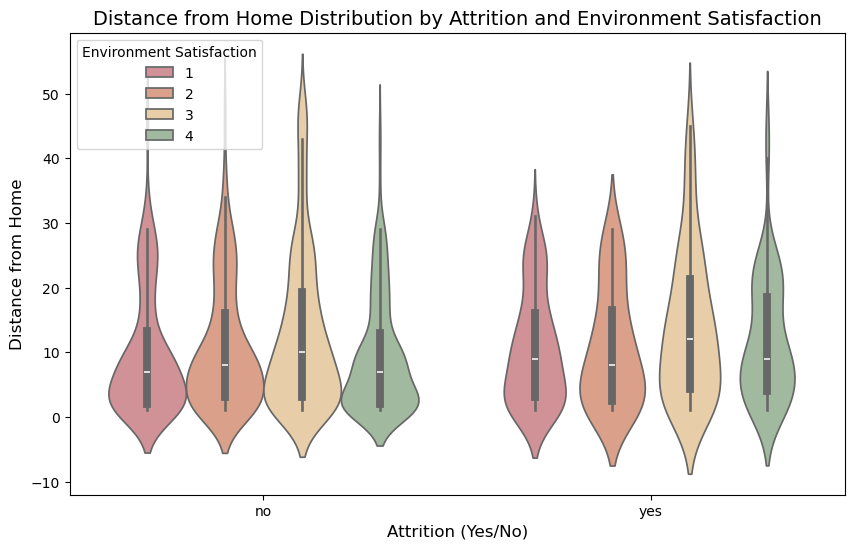

In [ ]:
# Relationship between job satisfaction and distance to work.

# Configuration
plt.figure(figsize=(10, 6))

# Violin Chart.
sns.violinplot(data=df_talent, x='attrition', y='distance_from_home', hue='environment_satisfaction', palette=paleta_team_1)

# Titles and labels
plt.title('Distance from Home Distribution by Attrition and Environment Satisfaction', fontsize=14)
plt.xlabel('Attrition (Yes/No)', fontsize=12)
plt.ylabel('Distance from Home', fontsize=12)
plt.legend(title='Environment Satisfaction')
plt.show()


In this graph, we focus on employees who decided to leave the company.
 
We observed that among those who reported high job satisfaction, there was a tendency to live further from their workplace, which could indicate a slight correlation between distance to work and their decision to leave the company.

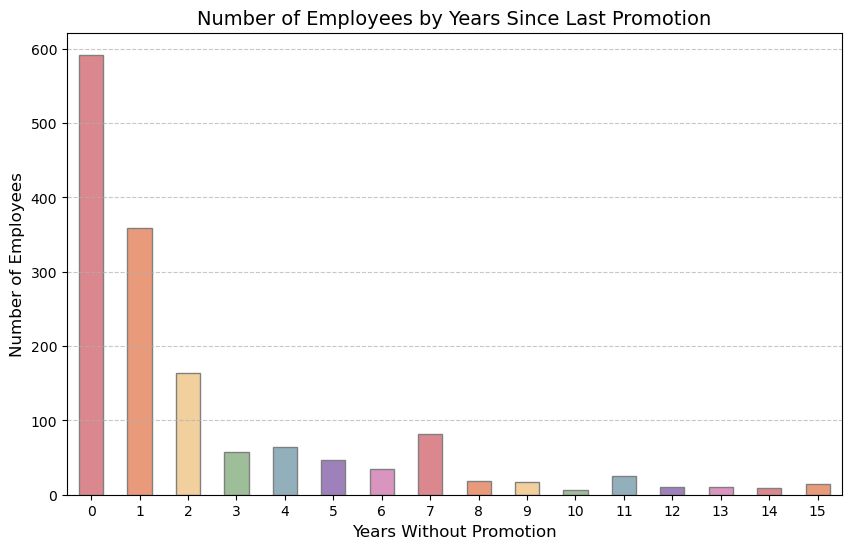

In [ ]:
# Impact of years without promotion and Attrition rate.
promotions_count = df_talent['years_since_last_promotion'].value_counts().sort_index()

# Configuration
plt.figure(figsize=(10, 6))

# Bar Chart
bars = promotions_count.plot(kind='bar', color=paleta_team_1[:len(promotions_count)], edgecolor='grey')

# Titles and labels
plt.title('Number of Employees by Years Since Last Promotion', fontsize=14)
plt.xlabel('Years Without Promotion', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Most employees received their last promotion during the current year, leading us to believe this is a hiring event.
As the number of years since the last promotion increases, the number of employees decreases significantly.
Small increases are observed in years 7 and 11, which could indicate specific trends in the company's promotion policy.

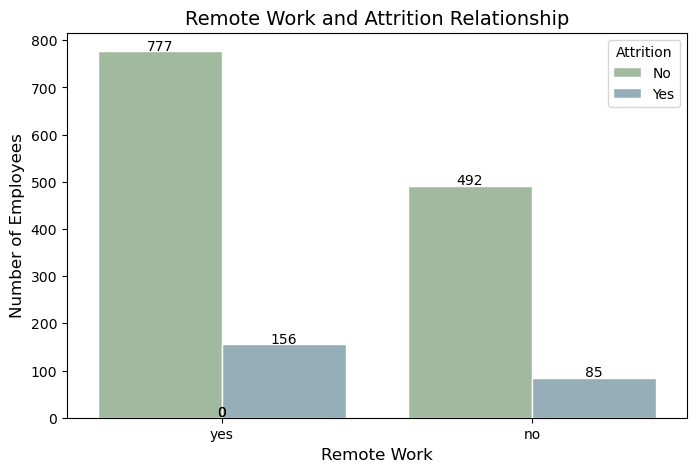

In [ ]:
# Relationship between remote work and attrition rate.

# Configuration
custom_colors = [paleta_team_1[3], paleta_team_1[4]]
plt.figure(figsize=(8, 5))

# Bar Chart.
ax = sns.countplot(data=df_talent, x='remote_work', hue='attrition', palette=custom_colors, edgecolor='white')

# Titles and labels
plt.title('Remote Work and Attrition Relationship', fontsize=14)
plt.xlabel('Remote Work', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Attrition', labels=['No', 'Yes'])
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, f'{count}', ha='center', fontsize=10)

plt.show()


Employees who telework appear to have a lower likelihood of turnover than those who do not. This could indicate that teleworking contributes to employee retention, perhaps due to greater flexibility or a better work-life balance.


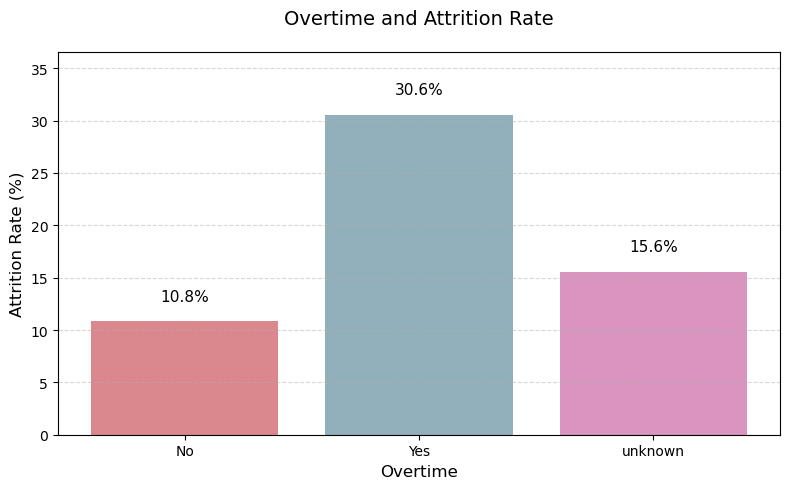

In [ ]:
# Relationship between overtime and staff attrition
rates = df_talent.groupby('overtime')['attrition'].value_counts(normalize=True).reset_index(name='rate')
rot_rate = rates[rates['attrition'] == 'yes']

# Configuration
plt.figure(figsize=(8, 5))

# Bar Chart
bars = plt.bar(rot_rate['overtime'], rot_rate['rate'] * 100, color=[paleta_team_1[0], paleta_team_1[4], paleta_team_1[6]])

# Titles and labels
plt.title('Overtime and Attrition Rate', fontsize=14, pad=20)
plt.xlabel('Overtime', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max([bar.get_height() for bar in bars]) + 6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.1f}%', ha='center', fontsize=11)
plt.tight_layout()
plt.show()


The graph shows a clear trend: employees who work overtime are at greater risk of leaving the company.
This analysis can be valuable for reviewing internal policies and determining how overtime affects employee retention.


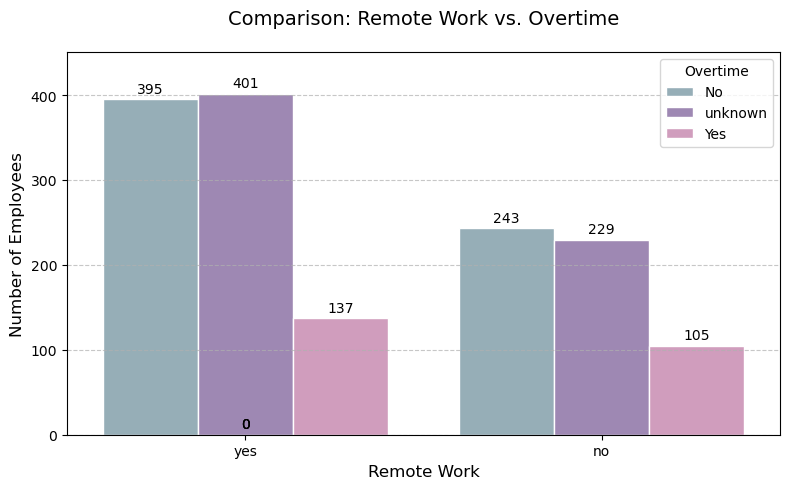

In [ ]:
# Impact of remote work on overtime.

# Configuration
custom_colors = [paleta_team_1[4], paleta_team_1[5], paleta_team_1[6]]
plt.figure(figsize=(8, 5))

# Bar Chart
ax = sns.countplot(data=df_talent,x='remote_work', hue='overtime', palette=custom_colors, edgecolor='white')

# Titles and labels
plt.title('Comparison: Remote Work vs. Overtime', fontsize=14, pad=20)
plt.xlabel('Remote Work', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Overtime')
plt.grid(axis='y', linestyle='--', alpha=0.7)
max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 50)
for p in ax.patches:
    count = int(p.get_height())
    ax.text( p.get_x() + p.get_width() / 2, p.get_height() + 8, f'{count}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Employees who don't work remotely appear to be more likely to work overtime than those who do.
This could indicate that in-person work is more associated with working overtime.

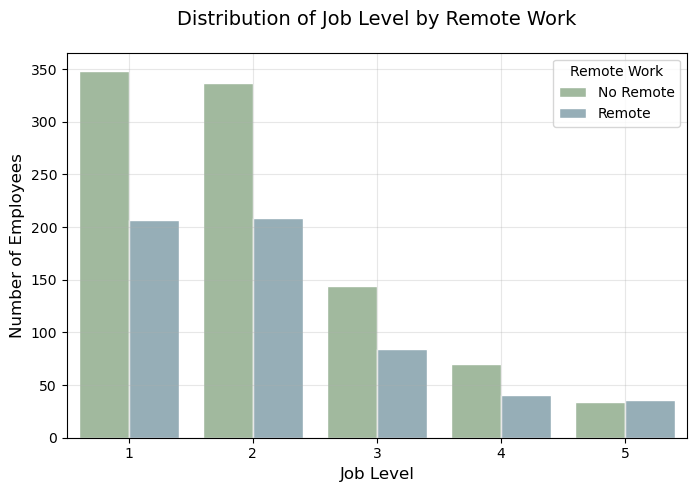

In [ ]:
# Comparison of Job Levels Between On-site and Remote Work.

# Configuration
plt.figure(figsize=(8, 5))
custom_colors = [paleta_team_1[3], paleta_team_1[4]]

# Bar Chart
ax = sns.countplot(data=df_talent, x='job_level', hue='remote_work', palette=custom_colors, edgecolor='white')

# Titles and labels
plt.title('Distribution of Job Level by Remote Work', fontsize=14, pad=20)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Remote Work', labels=['No Remote', 'Remote'])
plt.grid(True, alpha=0.3)


    - Levels 1 and 2:  
There are more employees who do not work remotely compared to those who do.  
This could indicate that entry-level roles tend to be more on-site.

    - Levels 3, 4, and 5:
Although there are still more non-remote employees, the difference between remote and on-site workers decreases compared to levels 1 and 2.  
This could suggest that higher or more specialized roles are more compatible with remote work.

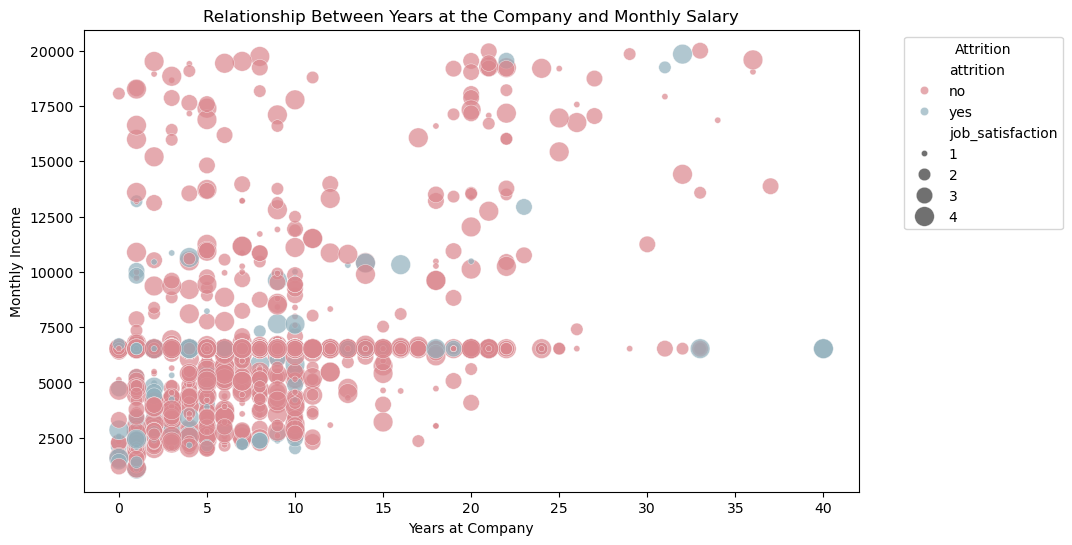

In [ ]:
# Relationship between years in the company and monthly salary.

# Configuration
custom_colors = [paleta_team_1[0], paleta_team_1[4]]
plt.figure(figsize=(10, 6))

# Scatter plot.
scatter = sns.scatterplot(
    data=df_talent,
    x='years_at_company',
    y='monthly_income',
    hue='attrition',  
    size='job_satisfaction',
    sizes=(20, 200),
    palette=custom_colors,
    alpha=0.7)

# Titles and labels
plt.title('Relationship Between Years at the Company and Monthly Salary')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


As noted, the majority of employees who leave the company are represented in pink and correspond to their first years with the organization. In contrast, the dots at the bottom of the graph indicate retirements. It's important to note that turnover is almost nonexistent at the highest salary levels, and the employees represented by the larger dots tend to remain with the company.


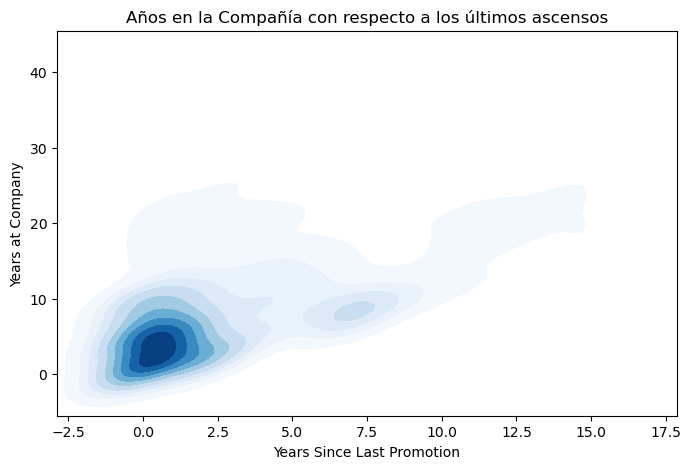

In [ ]:
# Analysis of employment projections and their impact on retention.

# Configuration
plt.figure(figsize=(8, 5))

# Density graph.
sns.kdeplot(data=df_talent, x='years_since_last_promotion', y='years_at_company', cmap='Blues', fill=True)

# Titles and labels
plt.title('Years in the Company compared to last promotions')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Years at Company')
plt.show()


The analysis shows that career growth is concentrated primarily in the first few years. Subsequently, a period of stagnation is observed between the third and sixth years of employment. From the seventh year onward, some promotions occur, which is a common pattern in many organizations.

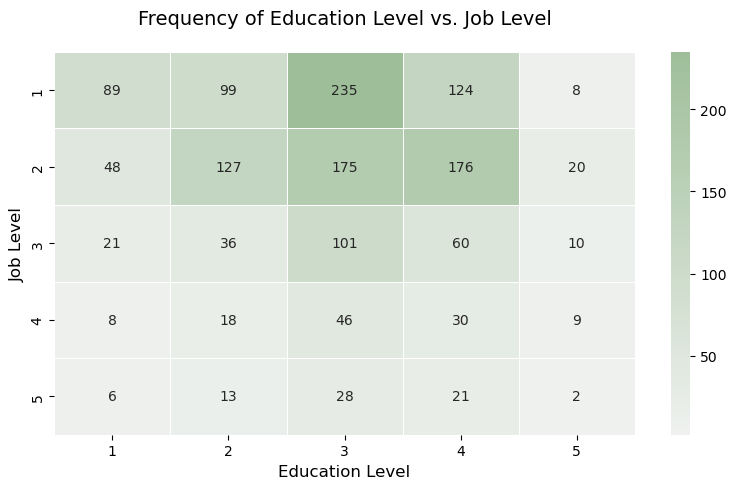

In [ ]:
# Relationship between educational level and employment level.

# Configuration
single_color_cmap = sns.light_palette("#9EBE99", as_cmap=True)
plt.figure(figsize=(8, 5))

# Pivot table.
pivot_table = df_talent.pivot_table(index='job_level', columns='education', aggfunc='size', fill_value=0)

# Heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', linecolor='white', linewidths=0.5, cmap=sns.light_palette("#9EBE99", as_cmap=True))

# Titles and labels
plt.title('Frequency of Education Level vs. Job Level', fontsize=14, pad=20)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Job Level', fontsize=12)
plt.tight_layout()
plt.show()


This heat map suggests that there may be cases of overqualification among employees, especially among those with intermediate and higher educational levels and those in lower-level positions.


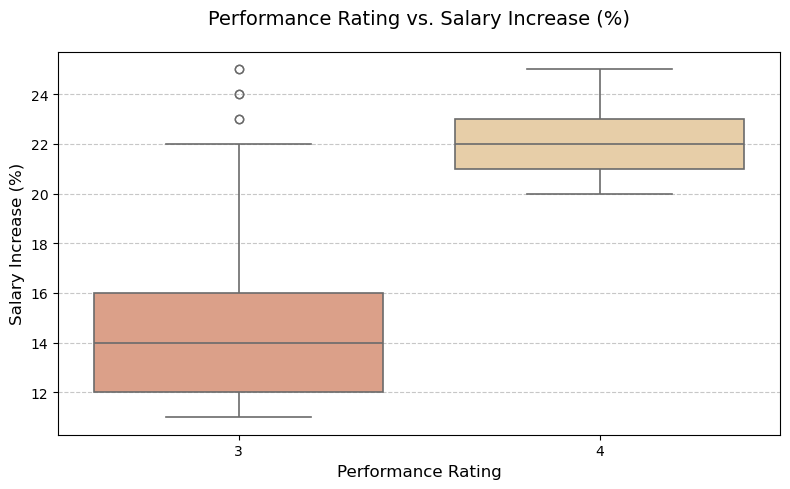

In [ ]:
# Relationship between salary increase and performance.

# Configuration
custom_colors = [paleta_team_1[1], paleta_team_1[2]]
plt.figure(figsize=(8, 5))

# Boxplot.
sns.boxplot(data=df_talent, x='performance_rating', y='percent_salary_hike',  palette=custom_colors, linewidth=1.2)

# Titles and labels
plt.title('Performance Rating vs. Salary Increase (%)', fontsize=14, pad=20)
plt.xlabel('Performance Rating', fontsize=12) 
plt.ylabel('Salary Increase (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In this graph, we can see a positive correlation between job performance and salary increases. Those with higher performance ratings tend to receive larger pay raises compared to employees with lower ratings.


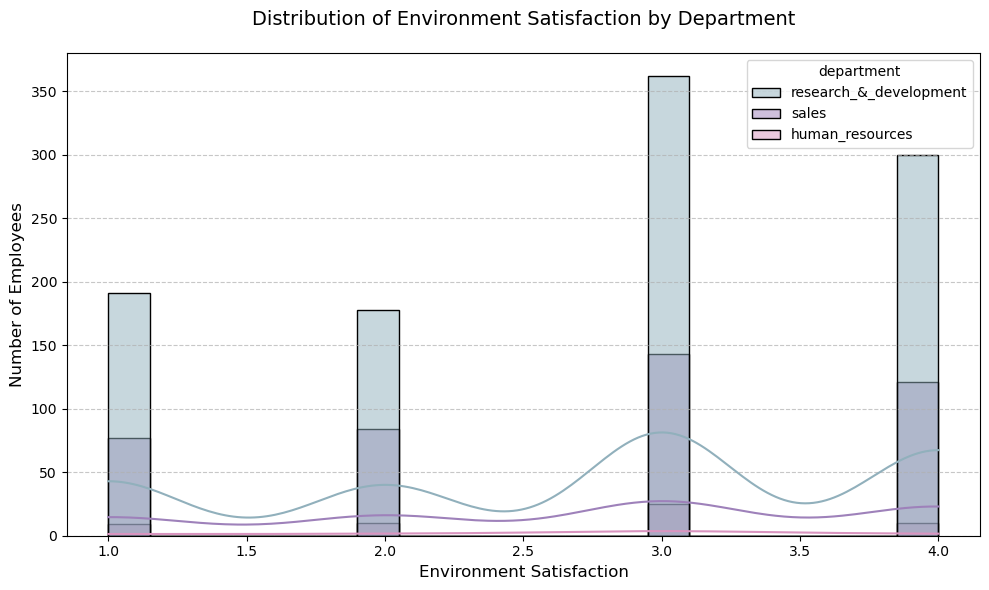

In [ ]:
# Comparison of job satisfaction between departments.

# Configuration.
plt.figure(figsize=(10, 6))
custom_colors = [paleta_team_1[4], paleta_team_1[5], paleta_team_1[6]]

# Histogram.
sns.histplot(data=df_talent, x='environment_satisfaction', hue='department', kde=True, bins=20, palette=custom_colors,edgecolor='black')

# Titles and labels
plt.title('Distribution of Environment Satisfaction by Department', fontsize=14, pad=20)
plt.xlabel('Environment Satisfaction', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La gráfica sugiere que investigación y desarrollo ofrece un ambiente laboral más satisfactorio en general, mientras que ventas podría beneficiarse de iniciativas para mejorar la satisfacción ambiental.


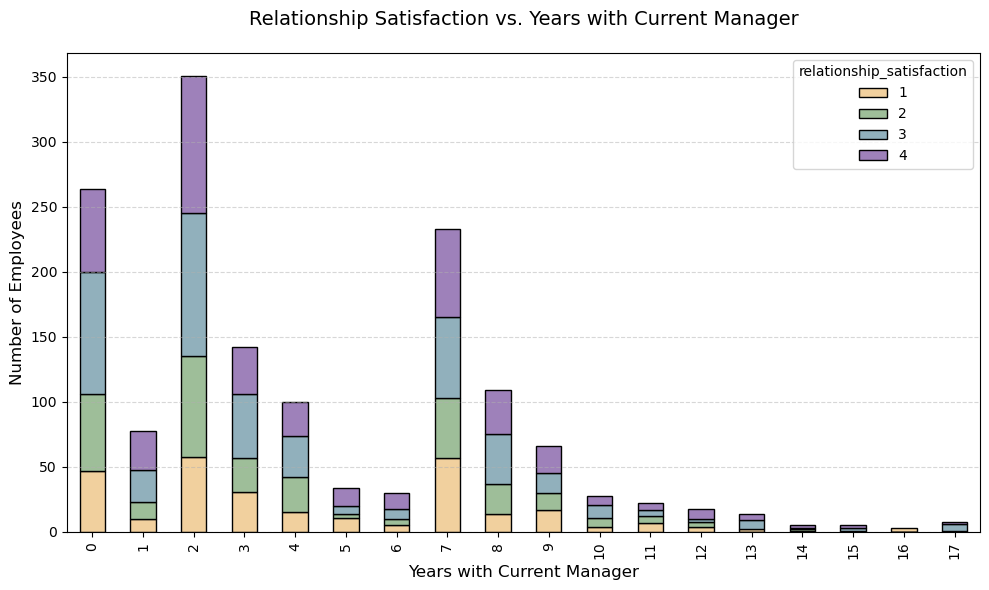

In [ ]:
# Impact of time with the same manager on employee satisfaction.

# Contingency table.
contingencia = pd.crosstab(df_talent['years_with_curr_manager'], df_talent['relationship_satisfaction'])

# Colors configuration.
custom_colors = [paleta_team_1[2], paleta_team_1[3], paleta_team_1[4], paleta_team_1[5]]

# Bar Chart.
contingencia.plot(kind='bar', stacked=True, color=custom_colors, edgecolor='black', figsize=(10, 6))

# Titles and labels
plt.title('Relationship Satisfaction vs. Years with Current Manager', fontsize=14, pad=20) 
plt.xlabel('Years with Current Manager', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Satisfaction with managers appears to be generally high, especially in the early years and in long-term relationships. However, there are periods in between when satisfaction fluctuates, indicating opportunities to optimize interaction between employees and their supervisors.


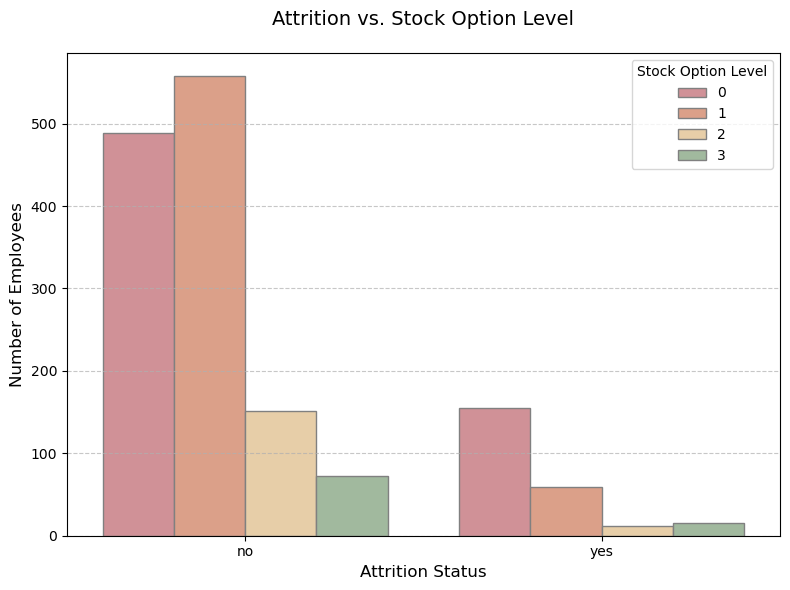

In [ ]:
# Impact of shareholding on attrition rate
data_summary = df_talent.groupby(['attrition', 'stock_option_level']).size().reset_index(name='count')

# Configuration
plt.figure(figsize=(8, 6))

# Bar Chart.
sns.barplot(x='attrition', y='count', hue='stock_option_level', data=data_summary, palette=paleta_team_1, edgecolor='grey')

# Titles and labels
plt.title('Attrition vs. Stock Option Level', fontsize=14, pad=20)
plt.xlabel('Attrition Status', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Stock Option Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In this chart, we can see an inverse correlation between the level of stock options and the likelihood of turnover. Employees with higher levels of stock options appear to be more motivated to stay. As the level of stock options increases, there is a notable decrease in both the number of departures and the total number of employees. This is possibly due to the financial security or long-term benefits that come with them.


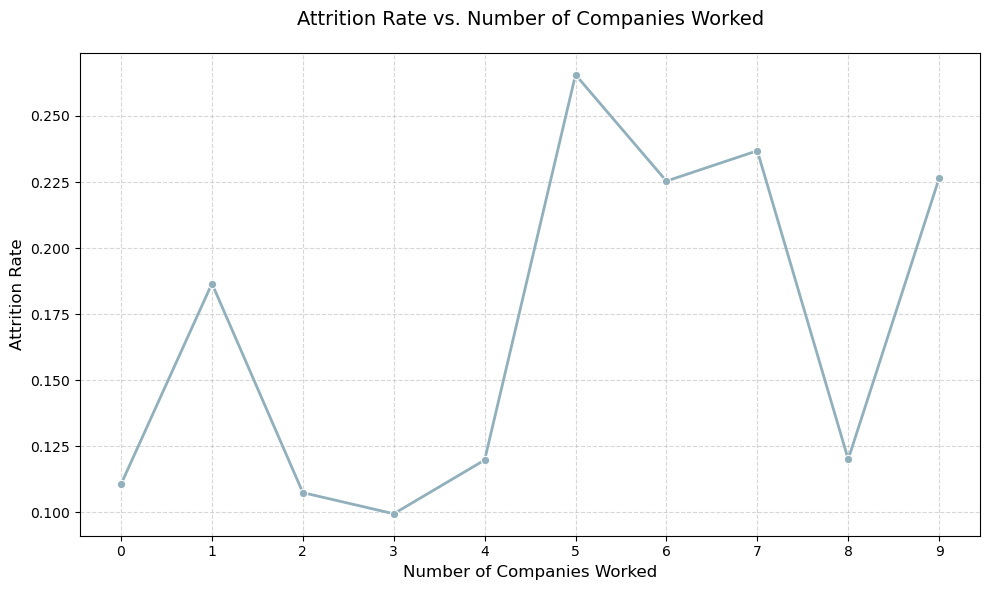

In [ ]:
# Relationship between attrition and number of companies worked in.

# Function to convert Yes/No to numeric.
def convertir_attrition(x):
    return 1 if x == 'yes' else 0
df_talent['attrition_binary'] = df_talent['attrition'].apply(convertir_attrition)
attrition_summary = df_talent.groupby('num_companies_worked').agg(attrition_rate=('attrition_binary', 'mean')).reset_index()

# Configuration
plt.figure(figsize=(10, 6))

# Line chart.
sns.lineplot(x='num_companies_worked', y='attrition_rate', data=attrition_summary, marker='o',color=paleta_team_1[4], linewidth=2)

# Titles and labels
plt.title('Attrition Rate vs. Number of Companies Worked', fontsize=14, pad=20)
plt.xlabel('Number of Companies Worked', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(range(int(df_talent['num_companies_worked'].min()), int(df_talent['num_companies_worked'].max()) + 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In this graph, we can see the relationship between turnover and the number of companies employees have worked for previously.
Experience in different companies seems to influence turnover; employees who have previously worked at only one company often have a limited perspective on how to compare their current work experience.
However, they might be more open to exploring new opportunities since they have already made the decision to change jobs in the past.
Employees with experience in multiple companies may be more accustomed to job mobility, which is why we observe the peak between 4 and 5 companies.


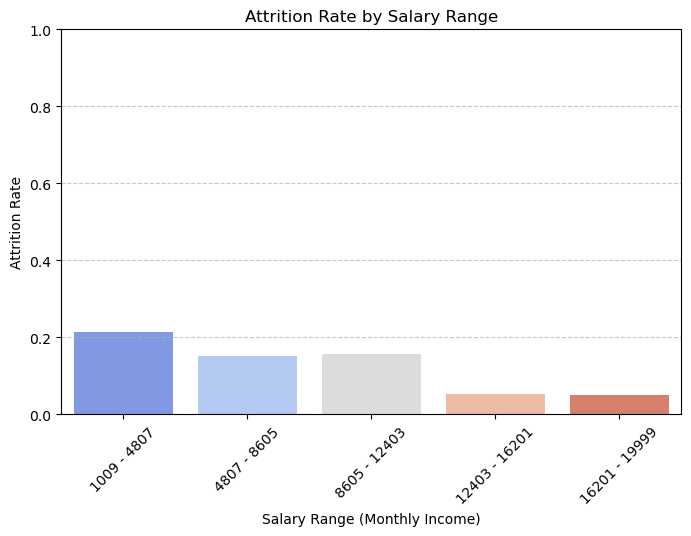

In [ ]:
# Relationship between monthly salary and attrition
df_talent["monthly_income"] = pd.to_numeric(df_talent["monthly_income"], errors="coerce")
bins = np.linspace(df_talent["monthly_income"].min(), df_talent["monthly_income"].max(), num=6)
labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]
df_talent["salary_range"] = pd.cut(df_talent["monthly_income"], bins=bins, labels=labels, include_lowest=True)
attrition_rate = df_talent.groupby("salary_range")["attrition_binary"].mean()

# Configuration
plt.figure(figsize=(8, 5))

# Bar chart
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="coolwarm")

# Titles and labels
plt.xlabel("Salary Range (Monthly Income)")
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Salary Range")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In this graph, we can see the correlation between salary and employee turnover. 

There is an inverse correlation between salary range and attrition rate. Lower-income employees tend to leave the company more frequently, while those earning more appear to be more engaged or satisfied.

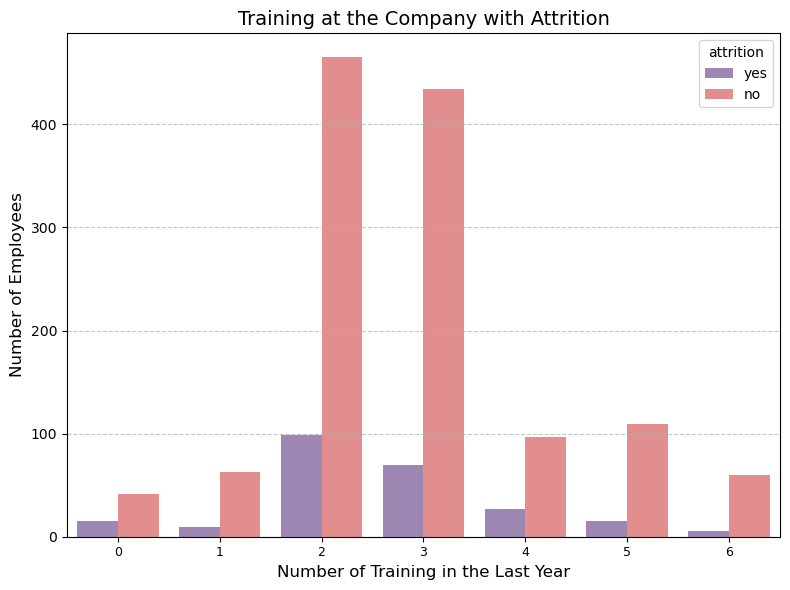

In [ ]:
# Relationship between training frequency and employee attrition.

# Configuration
custom_colors = ['#9E81BA', '#F08080']  # Púrpura para 'No' y rojo claro para 'Yes'
plt.figure(figsize=(8, 6))

# Bar Chart
sns.countplot(data=df_talent, x='training_times_last_year', hue='attrition', palette=custom_colors)

# Titles and labels
plt.title("Training at the Company with Attrition", fontsize=14)
plt.xlabel('Number of Training in the Last Year', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0, fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This graph suggests a possible correlation between the number of training sessions and staff turnover. Lower levels of training appear to be linked to a higher likelihood of leaving.


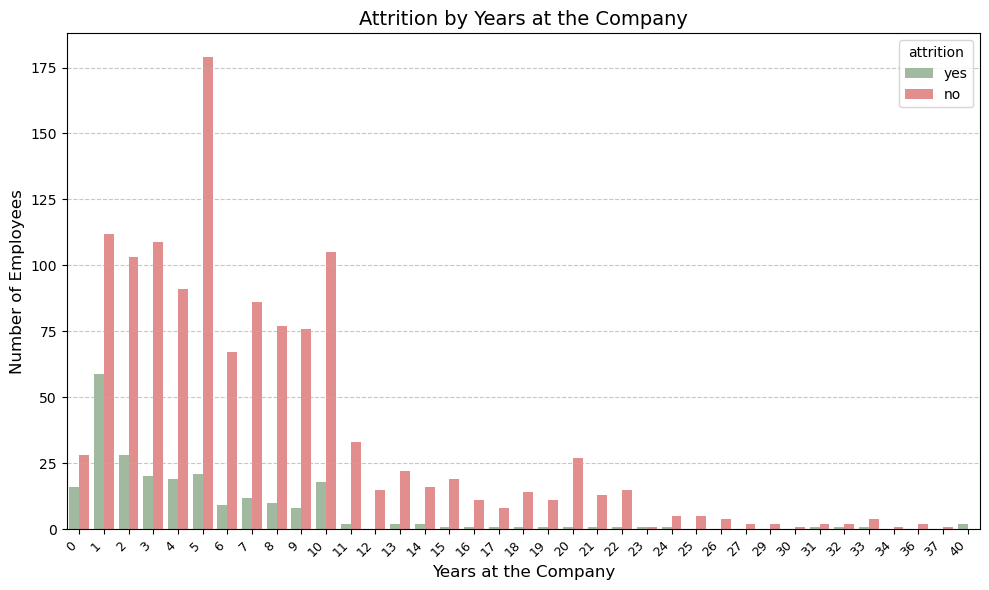

In [ ]:
# Impacto del Tiempo en la Empresa en la Rotación de Empleados.

# Configuration
custom_colors = ['#9EBE99', '#F08080']
plt.figure(figsize=(10, 6))

# Bar Chart
sns.countplot(data=df_talent, x='years_at_company', hue='attrition', palette=custom_colors)

# Titles and labels
plt.title("Attrition by Years at the Company", fontsize=14)
plt.xlabel('Years at the Company', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This graph shows that the proportion of employees leaving the company seems to decrease as the length of tenure increases. This could indicate that employees who surpass their first few years are more likely to commit to the organization for the long term.
